# Matrix Product Analysis
## Product

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
#Product Function
def matrixProduct(A,B,n,m,k):
    C = np.zeros((n,k),dtype=int)
    for i in range(0,n):
        for j in range(0,k):
            for l in range(0,m):
                C[i][j] = C[i][j]+(A[i][l]*B[l][j])
    return C

#This is the same function but with some changes to measure time taken by (+,*) operations
def matrixProductTimes(A,B,n,m,k):
    C = np.zeros((n,k),dtype=int)
    add,multi = 0,0
    for i in range(0,n):
        for j in range(0,k):
            for l in range(0,m):
                to = time.clock()
                pr = A[i][l]*B[l][j]
                tf = time.clock()
                multi = multi + (tf-to)
                to = time.clock()
                C[i][j] = C[i][j]+pr
                tf = time.clock()
                add = add + (tf-to)
    return C,add,multi


In [3]:
# we define the matrix dimesion nxm for two matrix
n,m,k = 5,5,5
bottom,top = -100,100

#Matrix A,B
A = np.random.randint(low = bottom,high = top, size = (n,m)) #n*m
B = np.random.randint(low = bottom,high = top, size = (m,k)) #n*k
to= time.clock()
C = matrixProduct(A,B,n,m,k)
tf= time.clock()

print ("Time> ",tf-to," seconds")
print("A = \n",A)
print("B = \n",B)
print("AB = \n",C)

Time>  0.0010069999999999801  seconds
A = 
 [[-71 -33  85 -82 -49]
 [-34 -42 -77 -83  96]
 [ 87 -88  20  10  51]
 [-67 -10 -82 -54  29]
 [ 37 -40  61  72  62]]
B = 
 [[-47  26 -65  58  27]
 [ 86  52  56  65 -92]
 [-69  73  98  -4 -43]
 [ 29  81  29  14 -21]
 [ 71 -33 -95 -22  59]]
AB = 
 [[-11223  -2382  13374  -6673  -3705]
 [  7708 -18580 -19215  -7668  13664]
 [ -9126  -1727 -13178  -1736  12384]
 [  8440 -13579  -8562  -5602   5482]
 [ -2898   7121  -2469  -1054   4202]]


## Time Plot
Here we check the time taken by product, for simplicity, we consider square matrix, giving us a complexity of $O(n^3)$. If we consider non squared matrices, the complexity would be $O(n*m*k)$ because of the behaviour of the function $\textit{matrixProduct(A,B,n,m,k)}$

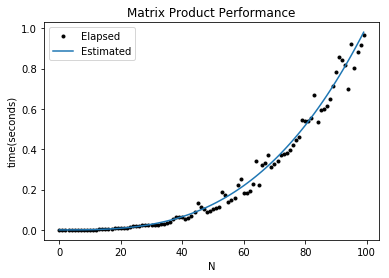

In [4]:
def expectedTime(n):
    #slow computer 10e6 - accoridng to https://gist.github.com/fagonzalezo/29c022675ee263a80987
    #Note that we consider the steps used to create C = np.zeros((n,k),dtype=int), that is n^2 steps
    return (n**3+n**2)/(10**6)

bottom,top = -100,100
matrixSize = 100
sizes = np.arange(0,matrixSize)
times = np.empty(matrixSize)
for i in sizes:
    n=m=k=i
    A = np.random.randint(low = bottom,high = top, size = (n,m)) #n*m
    B = np.random.randint(low = bottom,high = top, size = (m,k)) #n*k
    
    to= time.clock()
    C = matrixProduct(A,B,n,m,k)
    tf= time.clock()
    times[i]=tf-to

ela, =plt.plot(sizes,times,'k.',label = 'Elapsed')
est, =plt.plot(sizes,expectedTime(sizes),label = 'Estimated')
plt.legend(handles=[ela,est])
plt.title('Matrix Product Performance')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()

We also measure the time taken by the ($+,*$) operations in the matrix product.

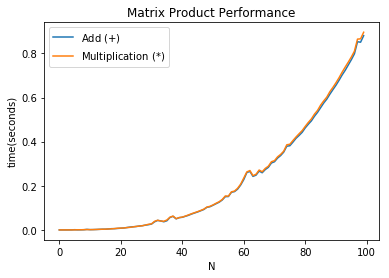

In [5]:
matrixSize = 100
sizes = np.arange(0,matrixSize)
timeAdd = np.empty(matrixSize)
timeProd = np.empty(matrixSize)
for i in sizes:
    n=m=k=i
    A = np.random.randint(low = bottom,high = top, size = (n,m)) #n*m
    B = np.random.randint(low = bottom,high = top, size = (m,k)) #n*k
    C,timeAdd[i],timeProd[i] = matrixProductTimes(A,B,n,m,k)
add, = plt.plot(sizes,timeAdd,label = 'Add $(+)$')
prod, = plt.plot(sizes,timeProd,label='Multiplication $(*)$')
plt.legend(handles=[add,prod])
plt.title('Matrix Product Performance')
plt.xlabel('N')
plt.ylabel('time(seconds)')
plt.show()